## Import Libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.tree import DecisionTreeClassifier

In [5]:
from sklearn.metrics import accuracy_score , confusion_matrix , plot_confusion_matrix

In [6]:
import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [7]:
data = pd.read_csv('data.csv')
data.head()

,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1


In [8]:
data['Label'].unique()

array([1, 0], dtype=int64)

In [9]:
data.dtypes

URLs        object
Headline    object
Body        object
Label        int64
dtype: object

In [10]:
data = data.drop(['URLs'] ,axis=1)
data.head()

,Headline,Body,Label
0,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1


In [11]:
data.shape

(4009, 3)

In [12]:
data.isnull().sum()

Headline     0
Body        21
Label        0
dtype: int64

In [13]:
data = data.dropna()

In [14]:
data.shape

(3988, 3)

## Classifier

In [15]:
h = data.iloc[:,0].values
b = data.iloc[:,1].values

In [16]:
h

array(['Four ways Bob Corker skewered Donald Trump',
       "Linklater's war veteran comedy speaks to modern America, says star",
       'Trump’s Fight With Corker Jeopardizes His Legislative Agenda',
       ..., 'Trump Jr. Is Soon To Give A 30-Minute Speech For $100,000',
       'China to accept overseas trial data in bid to speed up drug approvals',
       'Vice President Mike Pence Leaves NFL Game Because of Anti-American Protests'],
      dtype=object)

In [17]:
b

array(['Image copyright Getty Images\nOn Sunday morning, Donald Trump went off on a Twitter tirade against a member of his own party.\nThis, in itself, isn\'t exactly huge news. It\'s far from the first time the president has turned his rhetorical cannons on his own ranks.\nThis time, however, his attacks were particularly biting and personal. He essentially called Tennessee Senator Bob Corker, the chair of the powerful Senate Foreign Relations Committee, a coward for not running for re-election.\nHe said Mr Corker "begged" for the president\'s endorsement, which he refused to give. He wrongly claimed that Mr Corker\'s support of the Iranian nuclear agreement was his only political accomplishment.\nUnlike some of his colleagues, Mr Corker - free from having to worry about his immediate political future - didn\'t hold his tongue.\nSkip Twitter post by @SenBobCorker It\'s a shame the White House has become an adult day care center. Someone obviously missed their shift this morning. — Sen

In [18]:
h.shape

(3988,)

In [19]:
b.shape

(3988,)

In [20]:
## Classifier
cv = CountVectorizer()

In [21]:
head = cv.fit_transform(h).todense()
body = cv.fit_transform(b).todense()

In [22]:
X = np.hstack((head,body))
y = data['Label']

In [23]:
X.shape

(3988, 53220)

In [24]:
y.shape

(3988,)

## Train Test Split

In [25]:
X_train ,X_test ,y_train ,y_test = train_test_split(X,y,test_size=0.33,random_state=0)

## Model

In [26]:
model = DecisionTreeClassifier(criterion='entropy')

In [27]:
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [28]:
y_pred = model.predict(X_test)

## Accuracy of model

In [29]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9521640091116174

In [30]:
confusion_matrix(y_test,y_pred)

array([[678,  36],
       [ 27, 576]], dtype=int64)

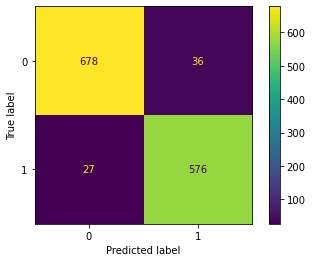

In [31]:
plot_confusion_matrix(
                        model , 
                        X_test ,
                        y_test
                      )